# Titanic Survival Prediction

In [61]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer 
from sklearn.preprocessing import RobustScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, StratifiedKFold, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from joblib import parallel_backend, dump
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import accuracy_score

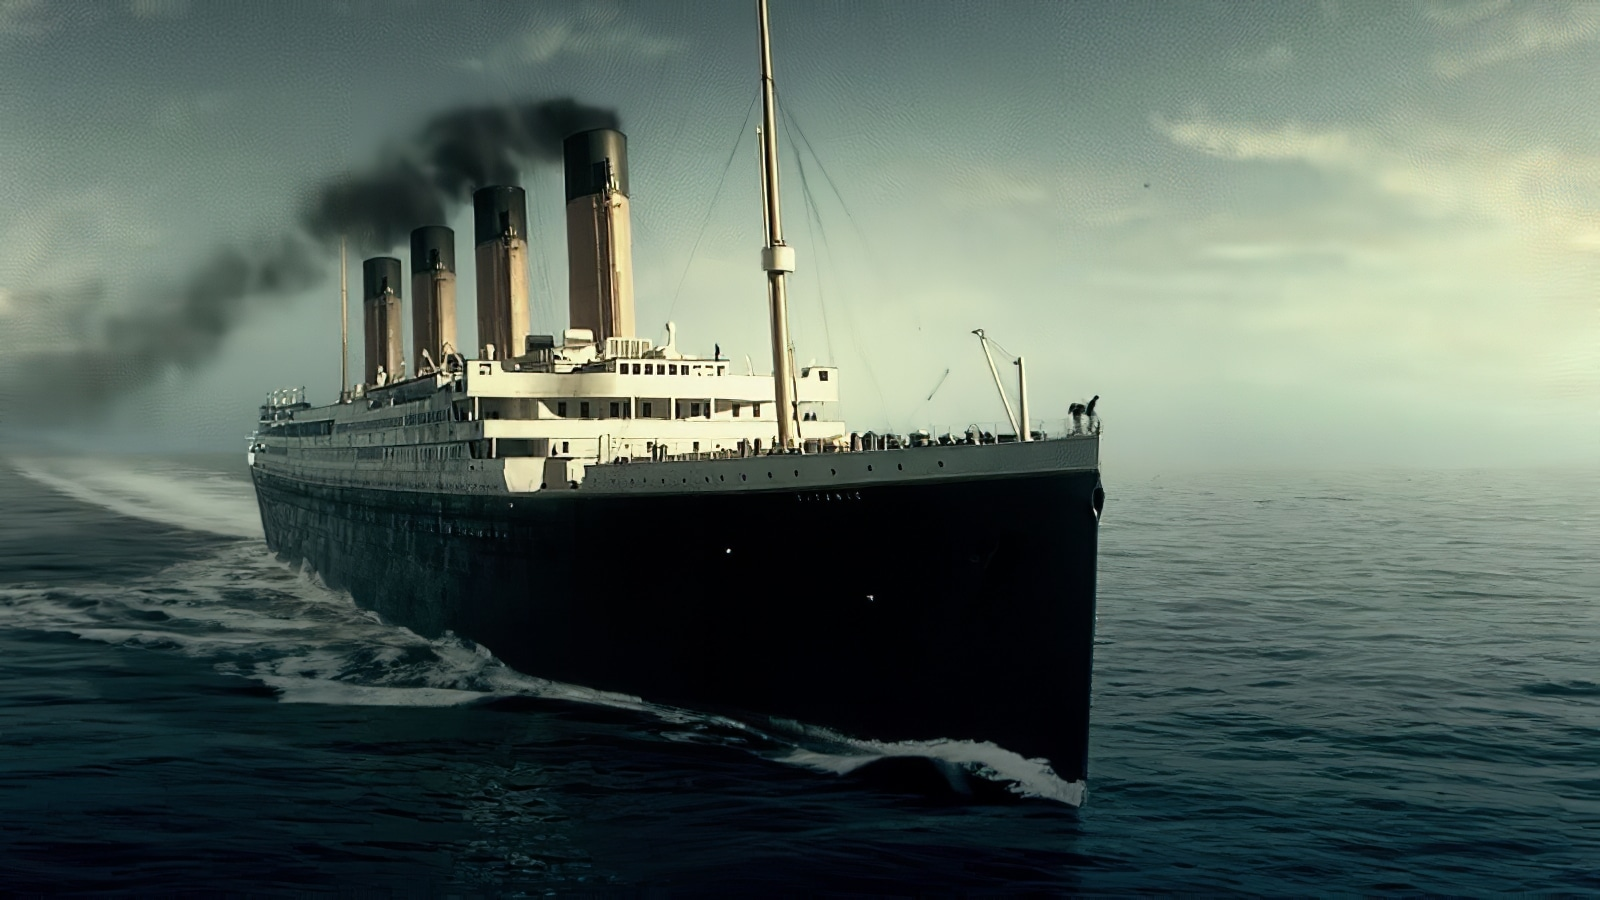

In [62]:
from IPython.display import display, Image
image_path = r"C:\Users\user\Desktop\ci1\ProjetRealisee\titanic\titanic_ship.jpeg"
display(Image(filename=image_path, width=1000, height=100))

## Description

## About the Dataset

In [63]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

___________________________

## Data Wrangling

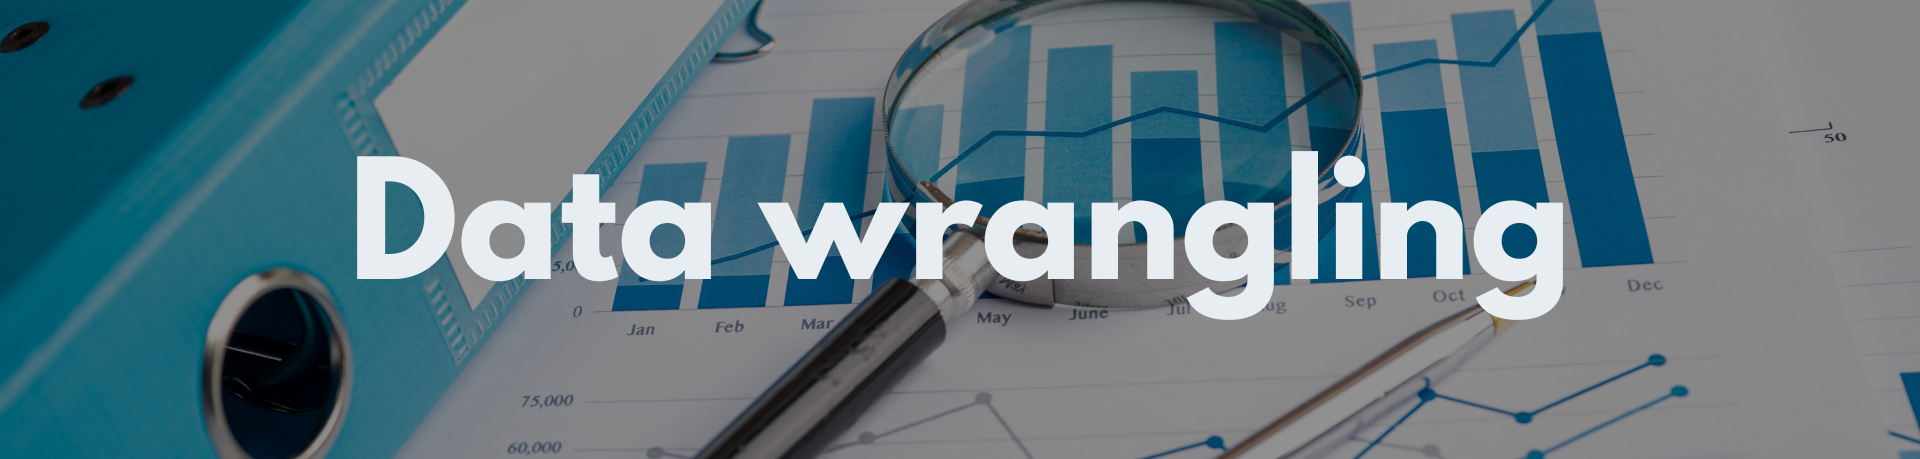

In [64]:
from IPython.display import display, Image
image_path = r"C:\Users\user\Desktop\ci1\ProjetRealisee\titanic\DW.png"
display(Image(filename=image_path, width=1000, height=100))  # Adjust width and height as needed

In [65]:
# Import data
train_data = pd.read_csv(r"C:\Users\user\Desktop\ci1\ProjetRealisee\titanic\data\train.csv")

In [66]:
# data type
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [67]:
# columns and rows number of the train data
train_data.shape

(891, 12)

In [68]:
# column names of the train data
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
# nul values in the train data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [71]:
train_data.shape

(891, 12)

#### ticket

In [72]:
dup = train_data.groupby('Ticket').size()
train_data['duplication'] = train_data['Ticket'].map(dup)

In [73]:
train_data.loc[train_data['Ticket'] == 'LINE', 'Ticket'] = 'LINE 0' 

In [74]:
def prefix(ticket):
    prefix = ticket.split(' ')[0][0]
    if prefix.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'digits'

In [75]:
train_data['Ticket_prefix'] = train_data['Ticket'].apply(prefix)
train_data['number_digits'] = train_data['Ticket'].apply(lambda x: len(str(x.split(' ')[-1])))

In [76]:
prefix_counts = train_data['Ticket_prefix'].value_counts()
prefix_groups = {
    'Additional': prefix_counts[prefix_counts <= 12].index.tolist()}

prefix_to_group = {prefix : group for group, prefixes in prefix_groups.items() for prefix in prefixes}
train_data['Ticket_prefix'] = train_data['Ticket_prefix'].replace(prefix_to_group)

In [77]:
train_data['first_digit'] = train_data['Ticket'].apply(lambda x: int(x.split(' ')[-1][0]))

In [78]:
train_data['Ticket_prefix'].value_counts()

Ticket_prefix
digits        661
Additional    143
PC             60
C.A.           27
Name: count, dtype: int64

In [79]:
train_data['Title'] = train_data['Name'].str.split('[,\.]', expand = True)[1].str.strip()

In [80]:
prefix_groups = {
    'Additional': ['Dr','Dona', 'Rev', 'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer', 'the Countess']
}
prefix_to_group = {prefix : group for group, prefixes in prefix_groups.items() for prefix in prefixes}
train_data['Title'] = train_data['Title'].replace(prefix_to_group)

#### Cabin

In [81]:
train_data['Cabin'] = train_data['Cabin'].str[0]

In [82]:
train_data['Cabin'].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [83]:
train_data['Cabin'] = train_data['Cabin'].replace({'T' : 'A'})

In [84]:
train_data['Cabin'] = train_data['Cabin'].fillna('Not_provided')

In [85]:
# The absence of cabin information is significant because it correlates with the majority of passengers who did not survive
# thats why i kept the Cabin column
print(train_data[train_data['Cabin'].isnull() & train_data['Survived'] == 0].shape[0], 
      train_data[train_data['Cabin'].isnull() & train_data['Survived'] == 1].shape[0])

891 0


#### Parch and SibSp

In [86]:
train_data['SibSp'] = train_data['SibSp'].replace({
    i:j for i, j in zip(range(9), [f'SibSp{i}' for i in range(3)]+['SibSp_more_than3']*6)
})

In [87]:
train_data['Parch'] = train_data['Parch'].replace({
    i:j for i, j in zip(range(7), [f'Parch{i}' for i in range(3)]+['Parch_more_than3']*4)
})

In [88]:
train_data['Parch'].value_counts()

Parch
Parch0              678
Parch1              118
Parch2               80
Parch_more_than3     15
Name: count, dtype: int64

In [89]:
# delete useless columns
train_data = train_data.drop(['Name', 'PassengerId', 'Ticket'], axis = 1)

___________________________________________

## Exploratory Data Analysis
All analysis in this part concerns only the train data

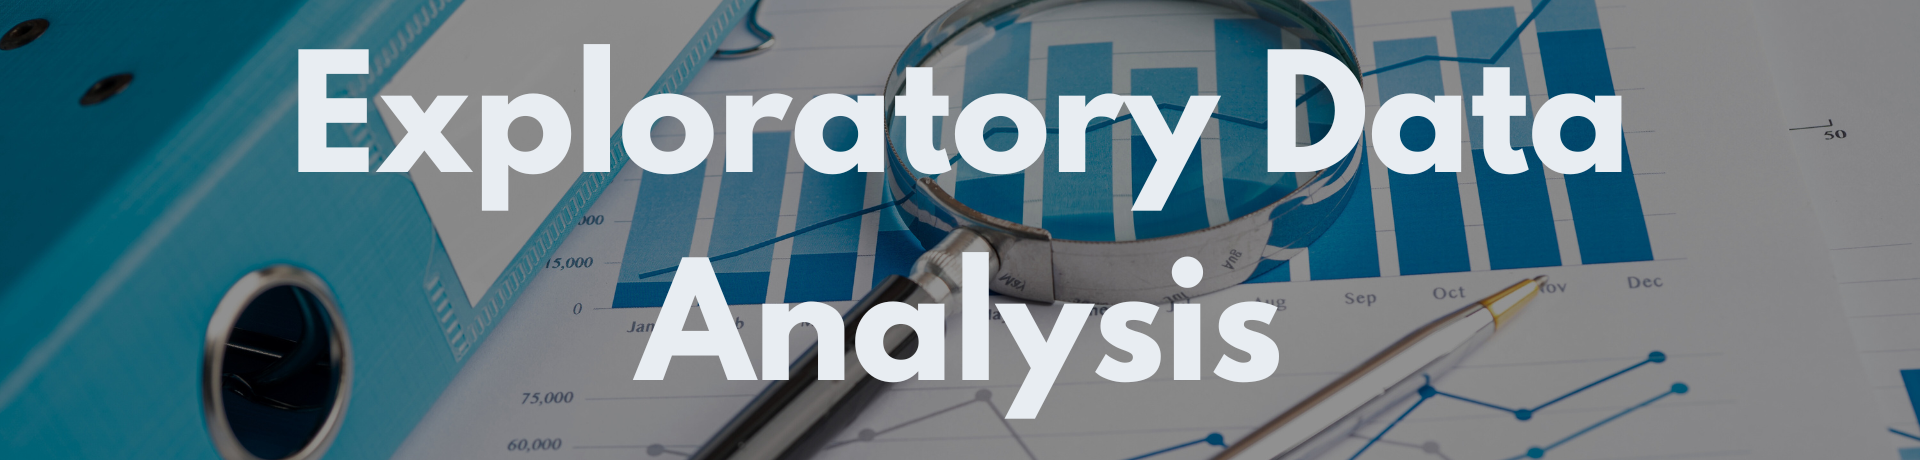

In [90]:
from IPython.display import display, Image
image_path = r"C:\Users\user\Desktop\ci1\ProjetRealisee\titanic\EDA.png"
display(Image(filename=image_path, width=1000, height=100))  # Adjust width and height as needed

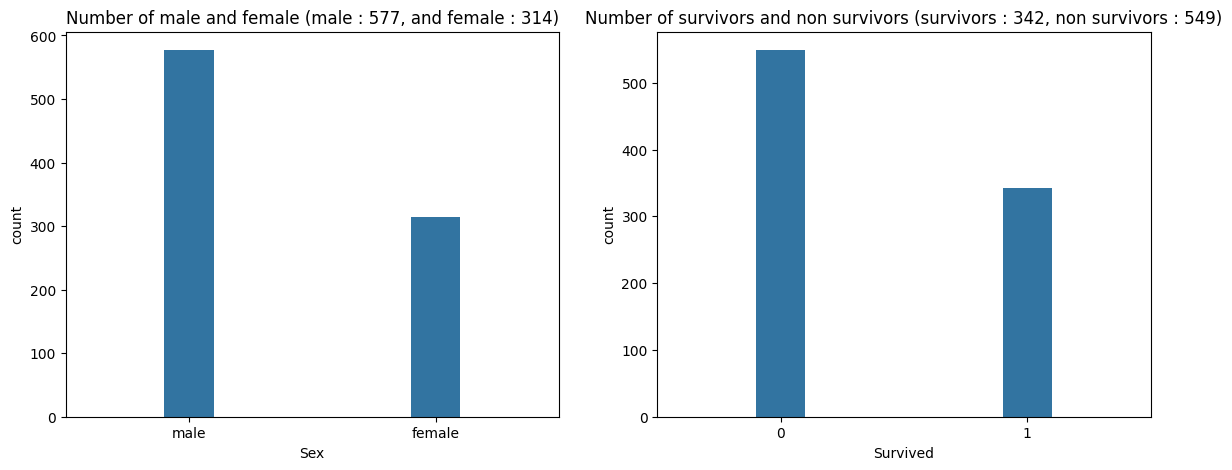

In [91]:
# number of male and female in the train data
male_number = train_data[train_data['Sex'] == 'male'].shape[0]
female_number = train_data[train_data['Sex'] == 'female'].shape[0]

# number of survvors and non survivors in the train data
number_survivors = train_data[train_data['Survived'] == 1].shape[0]
number_non_survivors = train_data[train_data['Survived'] == 0].shape[0]

plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
sns.countplot(data = train_data, x = 'Sex', width = 0.2)
plt.title(f'Number of male and female (male : {male_number}, and female : {female_number})')

plt.subplot(1, 2, 2)
sns.countplot(data = train_data, x = 'Survived', width = 0.2)
plt.title(f'Number of survivors and non survivors (survivors : {number_survivors}, non survivors : {number_non_survivors})')
plt.show()


* The number of male was 577, The number of female was 314
* 342 people survived the sinking and 549 people lost their lives.

Text(0.5, 1.0, 'Number of persons in each classe (class1 : 216, class2: 184, class3 : 491)')

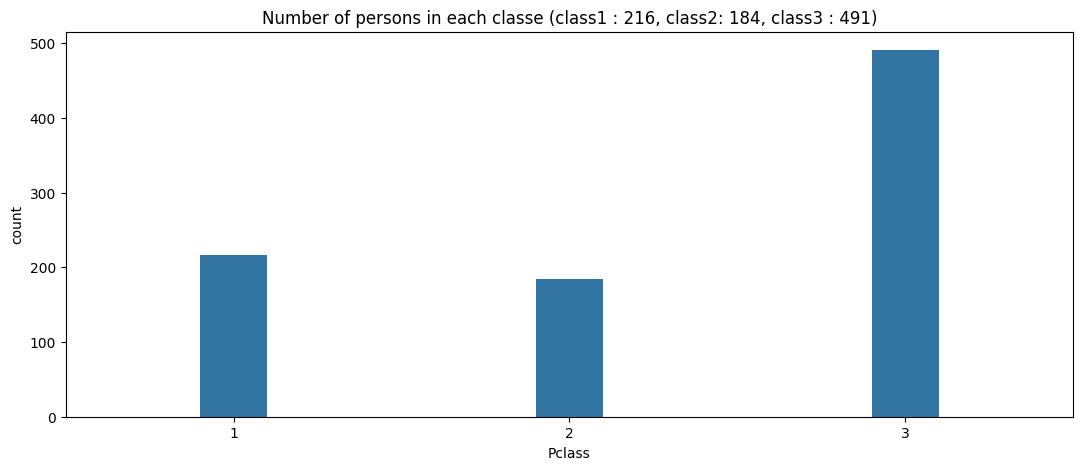

In [92]:
nbr_pers_class1 = train_data[train_data['Pclass'] == 1].shape[0]
nbr_pers_class2 = train_data[train_data['Pclass'] == 2].shape[0]
nbr_pers_class3 = train_data[train_data['Pclass'] == 3].shape[0]

plt.figure(figsize = (13, 5))
sns.countplot(data = train_data, x = 'Pclass', width = 0.2)
plt.title(f'Number of persons in each classe (class1 : {nbr_pers_class1}, class2: {nbr_pers_class2}, class3 : {nbr_pers_class3})')

the number of persons : 
* in the first class: 216
* in the second class: 184
* in the third class: 491

# Target VS Features

In [93]:
# features used in training
features  = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
categorical = ['Pclass', 'Sex', 'Embarked']
numerical = ['Age', 'SibSp', 'Parch', 'Fare']

### Survived - Class

(Survived = 0, Pclass = 1 ): 37.04 %
(Survived = 0, Pclass = 2 ): 52.72 %
(Survived = 0, Pclass = 3 ): 75.76 %
(Survived = 1, Pclass = 1 ): 62.96 %
(Survived = 1, Pclass = 2 ): 47.28 %
(Survived = 1, Pclass = 3 ): 24.24 %


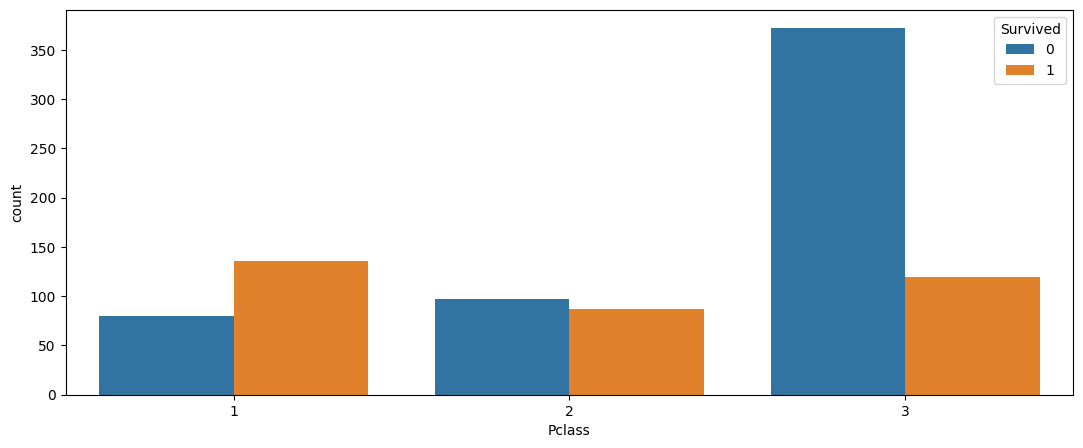

In [94]:
# survivors per class
for i in range(2):
    for j, k in zip([1, 2, 3], [nbr_pers_class1, nbr_pers_class2, nbr_pers_class3]):
        n = (train_data[(train_data['Survived'] == i) & (train_data['Pclass'] == j)].shape[0]) / k
        n *= 100 
        print('(Survived = {}, Pclass = {} ): {:.2f} %'.format(i, j, n))
plt.figure(figsize = (13, 5))
sns.countplot(data = train_data, x = 'Pclass', hue = 'Survived')
plt.show()

### Interpretation
In the first class, the number of survivors is greater than the number of fatalities. Conversely, in the second and third classes, the situation is reversed.

### Survived - Sex

(Survived = 0, Sex = male ): 0.81 %
(Survived = 0, Sex = female ): 0.26 %
(Survived = 1, Sex = male ): 0.19 %
(Survived = 1, Sex = female ): 0.74 %


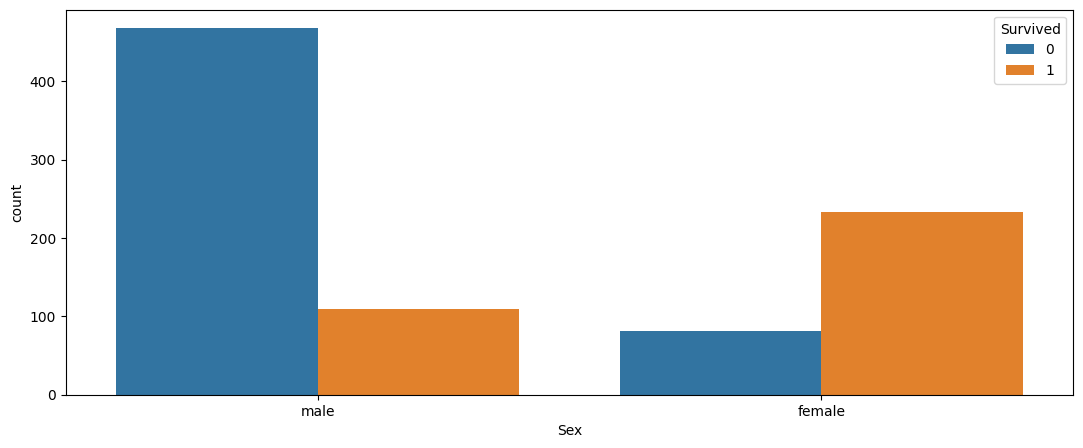

In [95]:
# survived per sex
for i in range(2):
    for j, k in zip(['male', 'female'], [male_number, female_number]):
        n = (train_data[(train_data['Survived'] == i) & (train_data['Sex'] == j)].shape[0]) / k
        print('(Survived = {}, Sex = {} ): {:.2f} %'.format(i, j, n))
plt.figure(figsize = (13, 5))
sns.countplot(data = train_data, x = 'Sex', hue = 'Survived')
plt.show()

### Interpretation
The number of female survivors exceeded that of males, so the opposite was true for fatalities.

### Survived - Fare

In [96]:
fig = px.box(train_data, x = 'Survived', y = 'Fare')
fig.show()

### Interpretation
* The median of the survivors' fare distribution is higher than that of the fatalities' fare distribution.


* the box of the survivors is larger than the box of non-survivors.

Which indicates that, on average, survivors paid a higher fare than those who did not survive.

### Survived - Age

In [97]:
plt.figure(figsize=(14, 5))
fig = px.strip(train_data, x='Survived', y='Age')
fig.show()

<Figure size 1400x500 with 0 Axes>

In [98]:
ages = [0, 18, 30, 60]
for j in range(2):
    print("\n")
    for i in range(3):
        nb = train_data[(train_data['Age'] >= ages[i]) & (train_data['Age'] <= ages[i+1]) & (train_data['Survived'] == j)].shape[0]
        nb /= train_data[(train_data['Age'] >= ages[i]) & (train_data['Age'] <= ages[i+1])].shape[0]
        nb *= 100
        print(f'Survived : {j}, and {ages[i]} < age < {ages[i+1]} : {nb:.2f} %')
        if ages[i+1] == 60 :
            nb = train_data[(train_data['Age'] > ages[i+1]) & (train_data['Survived'] == j)].shape[0]
            nb /= train_data[(train_data['Age'] > ages[i+1])].shape[0]
            nb *= 100
            print(f'Survived : {j}, and age > {ages[i+1]}: {nb:.2f} %')



Survived : 0, and 0 < age < 18 : 49.64 %
Survived : 0, and 18 < age < 30 : 64.53 %
Survived : 0, and 30 < age < 60 : 58.12 %
Survived : 0, and age > 60: 77.27 %


Survived : 1, and 0 < age < 18 : 50.36 %
Survived : 1, and 18 < age < 30 : 35.47 %
Survived : 1, and 30 < age < 60 : 41.88 %
Survived : 1, and age > 60: 22.73 %


### Interpretation
* children and teenagers (0-18) had equal chance to survive and the heighst chance compared to the other age groups.
* Young adults (18-30) and the Elderly passengers (over 60) had the lowest chance to survive, indicating they were less likely to survive compared to other age groups.
* Middle-aged passengers (30-60) had a heigher chance to survive than the Young adults and a lower chance than the children and teenagers age groupe.

### Survived - (parch and SibSp)

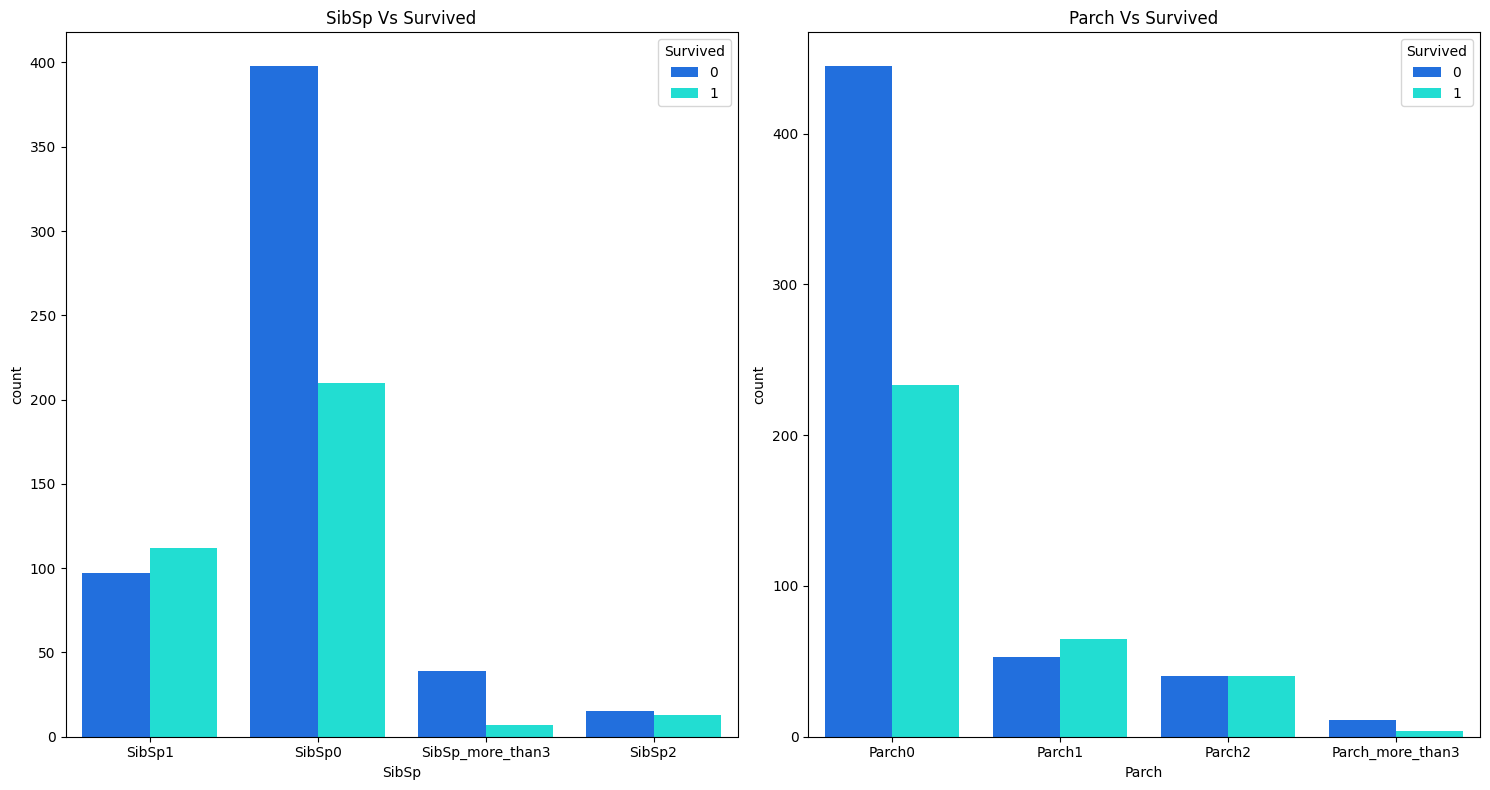

In [99]:
plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
sns.countplot(data = train_data, x = 'SibSp', hue = 'Survived', palette = ['#0369FC', '#03FCED'])
plt.title('SibSp Vs Survived')

plt.subplot(1, 2, 2)
sns.countplot(data = train_data, x = 'Parch', hue = 'Survived', palette = ['#0369FC', '#03FCED'])
plt.title('Parch Vs Survived')

plt.tight_layout()
plt.show()

### Interpretation

* **Survived - SibSp plot:** This plot illustrates the distribution of passengers' siblings and spouses. It suggests that passengers aboard the sinking Titanic alone and those with 3, 4, 5, and 8 siblings/spouses had a lower chance of survival, whereas those who traveled with only one had a higher survival chance. Additionally, passengers with 2 siblings/spouses had a slightly 50% chance of survival.

* **Survived - Parch plot:** This plot displays the distribution of passengers' parents and children. It reveals that passengers traveling with no children and parents had the lowest chance of survival, whereas those with more than one had a nearly 50% chance of survival.

* The number of parents or children (Parch) and the number of siblings or spouses (SibSp) a passenger has aboard the Titanic could correlate with their likelihood of survival due to various factors, including having someone to look after them or having more financial resources to aid in their survival.contradiction 

* In the following plot, we can observe why passengers with SibSp equal to 3 or 4 had a lower chance of survival.


In [100]:
plt.figure(figsize=(14, 5))
fig = px.strip(train_data, x='SibSp', y='Age', color = 'Survived')
fig.show()

<Figure size 1400x500 with 0 Axes>

The majority of non-surviving passengers with a Parch equal to 3 or 4 are children, which may indicate that:
- They don't have spouses, as they are children.
- They have younger siblings, because if they had older siblings or adults accompanying them, they might have received assistance and protection, potentially increasing their chances of survival.

### Survived - Embarked

<Axes: xlabel='Embarked', ylabel='count'>

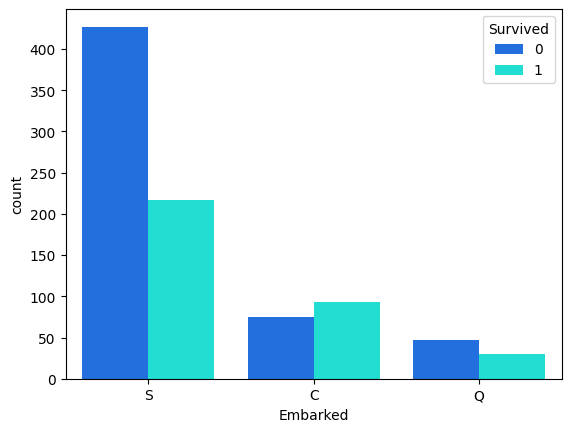

In [101]:
sns.countplot(data = train_data, x = 'Embarked', hue = 'Survived', palette = ['#0369FC', '#03FCED'])

In [102]:
C = train_data[train_data['Embarked'] == 'C'].shape[0]
S = train_data[train_data['Embarked'] == 'S'].shape[0]
Q = train_data[train_data['Embarked'] == 'Q'].shape[0]
print(f'Embarked from C : {C}, \nEmbarked from S : {S}, \nEmbarked from Q: {Q}')

Embarked from C : 168, 
Embarked from S : 644, 
Embarked from Q: 77


#### Interpretation
The majority of passengers aboard the Titanic from Southampton (S) (around 60%) and Queenstown (Q) lost their lives, whereas passengers aboard from Cherbourg (C) had a higher chance of survival, which might mean that Cherbourg was the port where many first or second-class or female passengers boarded.
We'll check that in the folowing plot.

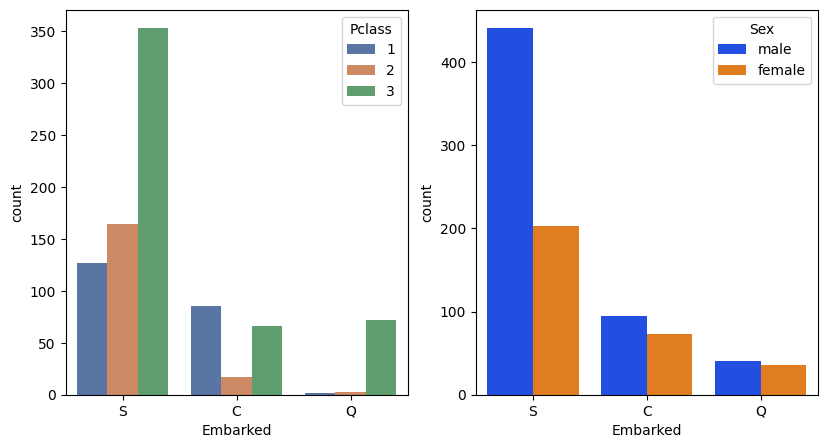

In [103]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data = train_data, x = 'Embarked', hue = 'Pclass', palette = 'deep')

plt.subplot(1, 3, 2)
sns.countplot(data = train_data, x = 'Embarked', hue = 'Sex', palette = 'bright')

plt.show()

*  number of first-class passengers aboard the Titanic from the port of Cherbourg is notably higher compared to the other ports.
* Additionally, the number of females aboard from Cherbourg is roughly equal to the number of males, which contrasts with the gender distribution observed in the other ports.

## Data Wrangling 2

In [104]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'duplication', 'Ticket_prefix', 'number_digits',
       'first_digit', 'Title'],
      dtype='object')

In [105]:
encoder = LabelEncoder()
encoders = {}
for col in ['Sex', 'Cabin', 'Embarked', 'Title', 'SibSp', 'Parch', 'Ticket_prefix']:
    train_data[col] = encoder.fit_transform(train_data[col])
    #test_data[col] = encoder.fit_transform(test_data[col])

In [106]:
transformer = RobustScaler()
for col in ['Fare', 'Age']:
    train_data[col] = transformer.fit_transform(train_data[[col]])

In [107]:
train_data.head()

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked  \
0         0       3    1 -0.335664      1      0 -0.312011      7         2   
1         1       1    0  0.559441      1      0  2.461242      2         0   
2         1       3    0 -0.111888      0      0 -0.282777      7         2   
3         1       1    0  0.391608      1      0  1.673732      2         2   
4         0       3    1  0.391608      0      0 -0.277363      7         2   

   duplication  Ticket_prefix  number_digits  first_digit  Title  
0            1              0              5            2      3  
1            1              2              5            1      4  
2            1              0              7            3      2  
3            2              3              6            1      4  
4            1              3              6            3      3

In [108]:
train_data.dtypes

Survived           int64
Pclass             int64
Sex                int32
Age              float64
SibSp              int32
Parch              int32
Fare             float64
Cabin              int32
Embarked           int32
duplication        int64
Ticket_prefix      int32
number_digits      int64
first_digit        int64
Title              int32
dtype: object

In [109]:
imputer1 = KNNImputer(n_neighbors = 3)
train_data = pd.DataFrame(imputer1.fit_transform(train_data), columns=train_data.columns)
#test_data = pd.DataFrame(imputer1.fit_transform(test_data), columns=test_data.columns)
train_data.head()

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked  \
0       0.0     3.0  1.0 -0.335664    1.0    0.0 -0.312011    7.0       2.0   
1       1.0     1.0  0.0  0.559441    1.0    0.0  2.461242    2.0       0.0   
2       1.0     3.0  0.0 -0.111888    0.0    0.0 -0.282777    7.0       2.0   
3       1.0     1.0  0.0  0.391608    1.0    0.0  1.673732    2.0       2.0   
4       0.0     3.0  1.0  0.391608    0.0    0.0 -0.277363    7.0       2.0   

   duplication  Ticket_prefix  number_digits  first_digit  Title  
0          1.0            0.0            5.0          2.0    3.0  
1          1.0            2.0            5.0          1.0    4.0  
2          1.0            0.0            7.0          3.0    2.0  
3          2.0            3.0            6.0          1.0    4.0  
4          1.0            3.0            6.0          3.0    3.0

In [110]:
train_data['is_alone'] = train_data.apply(lambda x: 'alone' if x['SibSp']==0 and x['Parch']==0 else 'not_alone', axis=1)

In [111]:
train_data['is_alone'] = encoder.fit_transform(train_data['is_alone'])

### Correlation

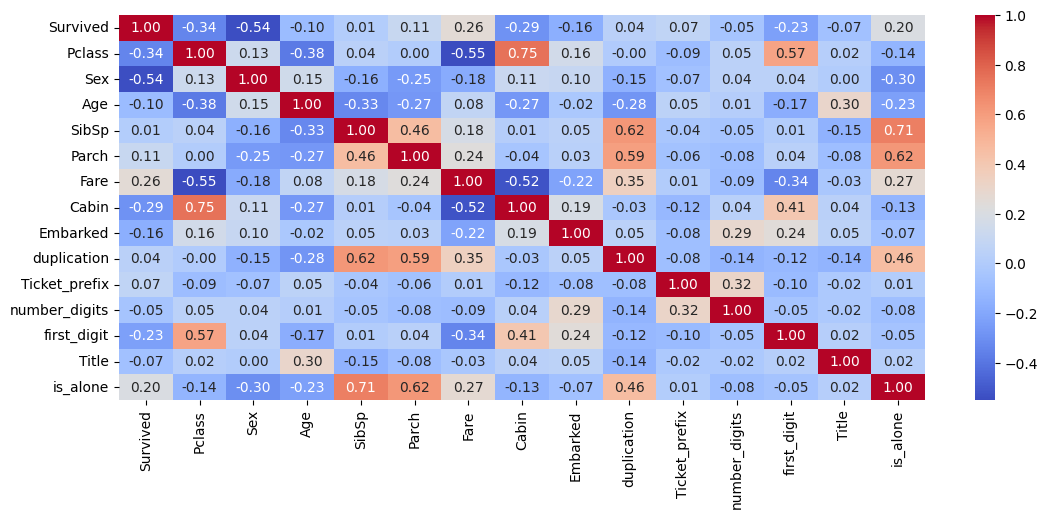

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer 
correlation_matrix = train_data.corr()
plt.figure(figsize = (13, 5))
sns.heatmap(correlation_matrix, annot = True, fmt=".2f", cmap='coolwarm')
plt.show()

### Interpretation:
The important correlations are between 'Survived' and 'Sex' and between 'Pclass' and 'Fare', with a correlation coefficient of -0.54:

* The negative correlation coefficient suggests that as the passenger class increases, the fare paid by passengers tends to decrease.
* Additionally, female passengers (encoded as 0) tend to have a higher likelihood of survival, whereas male passengers (encoded as 1) tend to have a lower likelihood of survival.
This is followed by the correlations between 'Survived' and 'Pclass' and between 'Pclass' and 'Age', with a correlation coefficient of -0.34:

* The negative correlation coefficient indicates that as the passenger class increases, passengers tend to have a lower chance of survival.
* Moreover, there seems to be a trend where the ages of passengers within higher passenger classes are lower compared to those in lower classes. 
The following plots will be used to verify these observations

# Age vs Pclass

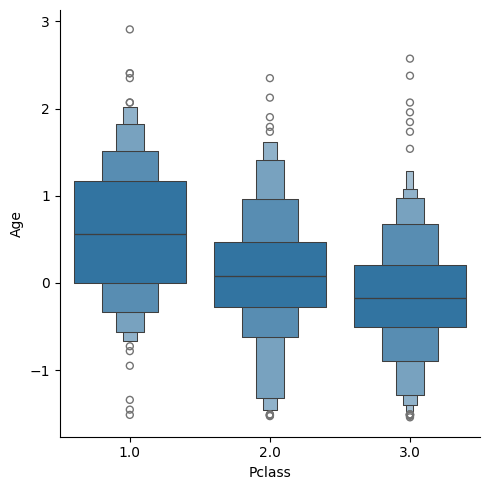

In [113]:
sns.catplot(data=train_data, x='Pclass', y='Age', kind='boxen')

### Interpretation
This plot supports the previous point. It's evident that the distribution of ages contains smaller ages, and the median decreases as age increases.

### Fare Vs Pclass

In [114]:
fig = px.box(train_data, x='Pclass', y='Fare')
fig.show()

### Interpretation
* The median fare distribution for passengers in the first class is approximately 60, for the second class it is 14, and for the third class it is 8.
* The distribution of fares shows lower values as passenger class increases.

indicating that fares tend to decrease as passenger class increases.

for col in ['Sex', 'Cabin', 'Embarked', 'Title', 'Pclass', 'Ticket']:
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)

train_data = pd.get_dummies(train_data).astype(int)
test_data = pd.get_dummies(test_data).astype(int)

## Feature Selection

### Categorical variables

In [115]:
col = ['Pclass', 'Sex', 'Cabin', 'Title', 'SibSp', 'Parch', 'is_alone', 'first_digit', 'duplication', 'Ticket_prefix', 'Embarked']
categorical_data = train_data[col]
target = train_data['Survived']
selector = SelectKBest(chi2, k=3)
selector.fit_transform(categorical_data, target)

array([[1., 7., 2.],
       [0., 2., 1.],
       [0., 7., 3.],
       ...,
       [0., 7., 6.],
       [1., 2., 1.],
       [1., 7., 3.]])

In [116]:
chi2_scores = selector.scores_
chi2_pvalues = selector.pvalues_

chi2_results = pd.DataFrame({
    'Features' : categorical_data.columns,
    'chi2_score' : chi2_scores,
    'p_values' : chi2_pvalues*100
})

chi2_results = chi2_results.sort_values(by = 'chi2_score', ascending = False)
fig = px.bar(chi2_results, x = 'Features', y = 'chi2_score')
fig.show()

### Numerical variables

In [117]:
numerical_data = train_data[['Fare', 'Age']]
selector = SelectKBest(f_classif, k=2)
selector.fit_transform(numerical_data, train_data['Survived'])

array([[-0.3120106 , -0.33566434],
       [ 2.46124229,  0.55944056],
       [-0.28277666, -0.11188811],
       ...,
       [ 0.38960398, -0.70862471],
       [ 0.67328148, -0.11188811],
       [-0.29035583,  0.22377622]])

In [118]:
scores = selector.scores_
pvalues = selector.pvalues_

results = pd.DataFrame({
    'Features' : numerical_data.columns,
    'score' : scores,
    'p_values' : pvalues*100
})

results = results.sort_values(by = 'score', ascending = False)
fig = px.bar(results, x = 'Features', y = 'score')
fig.show()

## Model Selection

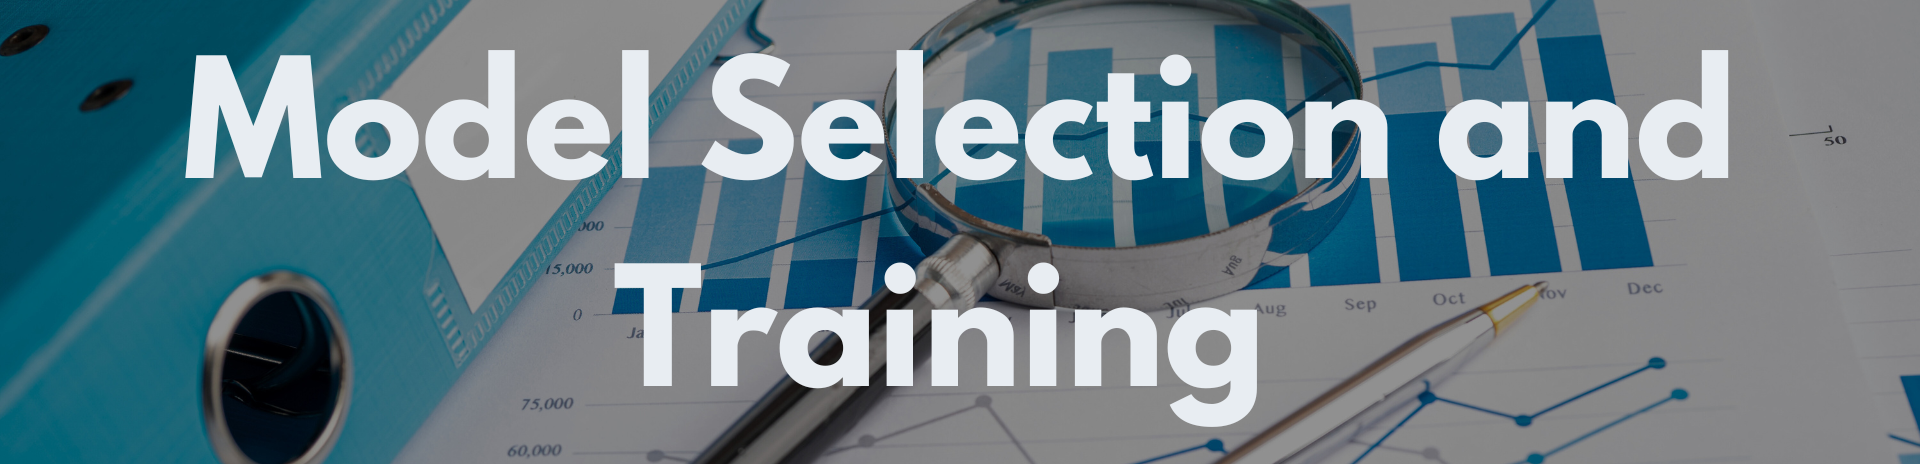

In [120]:
from IPython.display import display, Image
image_path = r"C:\Users\user\Desktop\ci1\ProjetRealisee\titanic\MT.png"
display(Image(filename=image_path, width=1000, height=100))  # Adjust width and height as needed

In [121]:
train_data.head()

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked  \
0       0.0     3.0  1.0 -0.335664    1.0    0.0 -0.312011    7.0       2.0   
1       1.0     1.0  0.0  0.559441    1.0    0.0  2.461242    2.0       0.0   
2       1.0     3.0  0.0 -0.111888    0.0    0.0 -0.282777    7.0       2.0   
3       1.0     1.0  0.0  0.391608    1.0    0.0  1.673732    2.0       2.0   
4       0.0     3.0  1.0  0.391608    0.0    0.0 -0.277363    7.0       2.0   

   duplication  Ticket_prefix  number_digits  first_digit  Title  is_alone  
0          1.0            0.0            5.0          2.0    3.0         1  
1          1.0            2.0            5.0          1.0    4.0         1  
2          1.0            0.0            7.0          3.0    2.0         0  
3          2.0            3.0            6.0          1.0    4.0         1  
4          1.0            3.0            6.0          3.0    3.0         0

In [122]:
final_data = train_data.copy()
cols = ['Pclass', 'Sex', 'Cabin', 'Title', 'SibSp', 'Parch', 'is_alone', 'first_digit', 'duplication', 'Ticket_prefix', 'Embarked']
final_data[cols] = final_data[cols].astype(str)

In [123]:
dummies = pd.get_dummies(final_data[cols])
col_to_keep = ['Survived', 'Age', 'Fare', 'number_digits']
final_data = pd.concat([dummies, final_data[col_to_keep]], axis = 1)

In [124]:
fnal_data = final_data.astype(int)

In [125]:
cols_name = ['Pclass_1.0', 'Pclass_2.0', 'Pclass_3.0', 'Sex_0.0', 'Sex_1.0',
       'Cabin_0.0', 'Cabin_1.0', 'Cabin_2.0', 'Cabin_3.0', 'Cabin_4.0',
       'Cabin_5.0', 'Cabin_6.0', 'Cabin_7.0', 'Title_0.0', 'Title_1.0',
       'Title_2.0', 'Title_3.0', 'Title_4.0', 'SibSp_0.0', 'SibSp_1.0',
       'SibSp_2.0', 'SibSp_3.0', 'Parch_0.0', 'Parch_1.0', 'Parch_2.0',
       'Parch_3.0', 'is_alone_0', 'is_alone_1', 'first_digit_0.0',
       'first_digit_1.0', 'first_digit_2.0', 'first_digit_3.0',
       'first_digit_4.0', 'first_digit_5.0', 'first_digit_6.0',
       'first_digit_7.0', 'first_digit_8.0', 'first_digit_9.0',
       'duplication_1.0', 'duplication_2.0', 'duplication_3.0',
       'duplication_4.0', 'duplication_5.0', 'duplication_6.0',
       'duplication_7.0', 'Ticket_prefix_0.0', 'Ticket_prefix_1.0',
       'Ticket_prefix_2.0', 'Ticket_prefix_3.0', 'Embarked_0.0',
       'Embarked_1.0', 'Embarked_2.0', 'Embarked_3.0', 'Age', 'Fare',
       'number_digits']

In [126]:
x_train, x_test, y_train, y_test = train_test_split(fnal_data.drop(['Survived'], axis = 1),
    fnal_data['Survived'], test_size = 0.2, random_state = 0)

In [127]:
x_train.columns = cols_name
x_test.columns = cols_name

### Voting Classifier

In [128]:
xgb = XGBClassifier()
RandF = RandomForestClassifier(random_state = 0)
SVM = SVC(probability = True)
KNN = KNeighborsClassifier()
GB = GradientBoostingClassifier()
gnb = GaussianNB()
adb = AdaBoostClassifier()
DT = DecisionTreeClassifier()
models = np.array([xgb, RandF, SVM, KNN, GB, gnb, adb, DT])

In [129]:
vot_clf = VotingClassifier(
    estimators = [('xgb_clf', xgb), ('RandF_clf', RandF), 
                  ('GB_clf', GB), ('gnb_clf', gnb), ('adb_clf', adb)],
    voting = 'soft'
)

In [130]:
vot_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('xgb_clf',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('RandF_clf',
                              RandomForestClassifier(random_state=0)),
                             ('GB_clf', GradientBoostingClassifier()),
                             ('gnb_clf', GaussianNB()),
                             ('adb_clf', AdaBoostClassifier())],
                 voting='soft')

In [131]:
print('train = {}, test = {}'.format(vot_clf.score(x_train, y_train), vot_clf.score(x_test, y_test)))

train = 0.8974719101123596, test = 0.8324022346368715


In [132]:
params = {
    'xgb_clf__n_estimators': [100, 200],
    'xgb_clf__max_depth': [3, 5],
    'RandF_clf__n_estimators': [100, 200],
    'RandF_clf__max_depth': [None, 10],
    'GB_clf__n_estimators': [100, 200],
    'GB_clf__max_depth': [3, 5],
    'gnb_clf__var_smoothing': [1e-09, 1e-08],
    'adb_clf__n_estimators': [50, 100],
    'adb_clf__learning_rate': [0.1, 1]
}

In [ ]:
cv = StratifiedKFold(4)
grid = GridSearchCV(vot_clf, params, cv = cv, return_train_score = True, verbose = True)
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_
xgb = grid.best_estimator_
print('train = {}, test = {}'.format(xgb.score(x_train, y_train), xgb.score(x_test, y_test)))

In [ ]:
test_score = np.array([])
train_score = np.array([])

for model in models:
    model.fit(x_train, y_train)
    train_score = np.append(train_score, model.score(x_train, y_train))
    test_score = np.append(test_score, model.score(x_test, y_test))


df = pd.DataFrame({
    'models' : ['xgb', 'RandF', 'SVM', 'KNN', 'GB', 'gnb', 'adb', 'DT'],
    'test_score' : test_score,
    'train_score' : train_score
})
df = df.sort_values(by = 'test_score', ascending = False)
print(df)

### XgbClassifier

In [133]:
xgb.fit(x_train, y_train)
print('train = {}, test = {}'.format(xgb.score(x_train, y_train), xgb.score(x_test, y_test)))

train = 0.922752808988764, test = 0.8156424581005587


In [134]:
featu_import = xgb.feature_importances_ * 100
booster = xgb.get_booster()
feature_names = booster.feature_names
for i, j in zip(featu_import, feature_names):
    print(j, ' : ', i)

Pclass_1.0  :  0.5551126
Pclass_2.0  :  1.276321
Pclass_3.0  :  5.6686034
Sex_0.0  :  0.91914666
Sex_1.0  :  0.0
Cabin_0.0  :  0.47731268
Cabin_1.0  :  0.5056326
Cabin_2.0  :  0.57629985
Cabin_3.0  :  1.1958597
Cabin_4.0  :  2.7218606
Cabin_5.0  :  0.0
Cabin_6.0  :  0.0
Cabin_7.0  :  0.7757651
Title_0.0  :  3.7770104
Title_1.0  :  0.29493958
Title_2.0  :  0.5911141
Title_3.0  :  27.108583
Title_4.0  :  1.2634552
SibSp_0.0  :  1.1297245
SibSp_1.0  :  0.53464127
SibSp_2.0  :  0.59560657
SibSp_3.0  :  6.0752172
Parch_0.0  :  0.882508
Parch_1.0  :  1.0000677
Parch_2.0  :  0.9424746
Parch_3.0  :  0.0
is_alone_0  :  0.8054141
is_alone_1  :  0.0
first_digit_0.0  :  0.0
first_digit_1.0  :  2.033583
first_digit_2.0  :  0.6466026
first_digit_3.0  :  0.46777552
first_digit_4.0  :  1.1810614
first_digit_5.0  :  2.1661294
first_digit_6.0  :  14.111607
first_digit_7.0  :  0.7898883
first_digit_8.0  :  0.0
first_digit_9.0  :  0.0
duplication_1.0  :  0.91733056
duplication_2.0  :  0.8030883
duplicatio

In [135]:
df = pd.DataFrame({
    'features' : feature_names,
    'Importance' : featu_import
})
df = df.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (25, 8))
fig = px.bar(df, x = 'features', y = 'Importance', title='Feature Importance Plot')
fig.show()

<Figure size 2500x800 with 0 Axes>

In [136]:
params = {
    'n_estimators': [100, 300, 600, 900],
    'learning_rate': [0.01, 0.03], 
    'max_depth': [k for k in range(1, 11, 2)], 
    'subsample': [0.5, 0.7, 0.9], 
    'colsample_bytree': [0.5, 0.7, 0.9],
    'random_state' : [0, 42]
}

In [ ]:
%%time
cv = StratifiedKFold(4)
grid = GridSearchCV(xgb, params,cv=cv, return_train_score=True, verbose = True)
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
xgb_ = grid.best_estimator_
print('train = {}, test = {}'.format(xgb.score(x_train, y_train), xgb.score(x_test, y_test)))

In [ ]:
import joblib
joblib.dump(xgb, 'xgboost_model_train6.pkl')

### RandomForest

In [186]:
RandF = RandomForestClassifier()
RandF.fit(x_train, y_train)
print('train = {}, test = {}'.format(RandF.score(x_train, y_train), RandF.score(x_test, y_test)))

train = 0.9311797752808989, test = 0.8324022346368715


In [624]:
import pickle
with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [187]:
feature_importances = RandF.feature_importances_ * 100

features = pd.DataFrame({
    'Feature': x_train.columns,  
    'Importance': feature_importances
})
features = features.sort_values(by='Importance', ascending=False)
fig = px.bar(features, x='Feature', y='Importance', title= 'featurs importances')
fig.show()

In [187]:
params= {
    'n_estimators': [100, 300, 700],
    'max_depth': [3, 6, 9],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [3, 5, 10],
    'criterion': ['entropy'], 
    'max_leaf_nodes': [10, 15, 20],
    'random_state': [42],
}

In [188]:
%%time
cv = StratifiedKFold(4)
grid = GridSearchCV(RandF, params, cv = cv, verbose = True)
grid.fit(x_train, y_train)

Fitting 4 folds for each of 486 candidates, totalling 1944 fits
CPU times: total: 12min 16s
Wall time: 12min 55s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9], 'max_leaf_nodes': [10, 15, 20],
                         'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 300, 700],
                         'random_state': [42]},
             verbose=True)

In [189]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 42}

In [190]:
RandF = grid.best_estimator_
print('train = {}, test = {}'.format(RandF.score(x_train, y_train), RandF.score(x_test, y_test)))

train = 0.8356741573033708, test = 0.8156424581005587


### GradientBoosting

In [188]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
print('train = {}, test = {}'.format(GB.score(x_train, y_train), GB.score(x_test, y_test)))

train = 0.8778089887640449, test = 0.8379888268156425


In [ ]:
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.1],
    'max_depth': [3, 4, 5]+[None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
}

In [ ]:
%%time
cv = StratifiedKFold(4)
grid = GridSearchCV(GB, params, cv = cv, n_jobs = -1, verbose = True)
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
GB = grid.best_estimator_
print('train = {}, test = {}'.format(GB.score(x_train, y_train), GB.score(x_test, y_test)))

### StackingClassifier

In [ ]:
StC =StackingClassifier(
    [('gb', GB), ('randf', RandF), ('xgb', xgb)],
                      final_estimator = RandF)
StC.fit(x_train, y_train)
print('train = {}, test = {}'.format(StC.score(x_train, y_train), StC.score(x_test, y_test)))

In [ ]:
AdaB = AdaBoostClassifier()
AdaB.fit(x_train, y_train)
print('train = {}, test = {}'.format(AdaB.score(x_train, y_train), AdaB.score(x_test, y_test)))

In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [180]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [181]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [184]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.3610 - val_accuracy: 0.8268 - val_loss: 0.3709
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8530 - loss: 0.3724 - val_accuracy: 0.8380 - val_loss: 0.3837
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8696 - loss: 0.3373 - val_accuracy: 0.8156 - val_loss: 0.3739
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8832 - loss: 0.3194 - val_accuracy: 0.8380 - val_loss: 0.3775
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8732 - loss: 0.3355 - val_accuracy: 0.8268 - val_loss: 0.3722
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8816 - loss: 0.3146 - val_accuracy: 0.8268 - val_loss: 0.3885
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8710 - loss: 0.3221 - val_accuracy: 0.8156 - val_loss: 0.3669
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8616 - loss: 0.3606 - val_accuracy: 0.8324 - v

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9230 - loss: 0.1798 - val_accuracy: 0.8324 - val_loss: 0.5201
Epoch 52/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9290 - loss: 0.1828 - val_accuracy: 0.8212 - val_loss: 0.5262
Epoch 53/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9240 - loss: 0.1959 - val_accuracy: 0.8156 - val_loss: 0.5773
Epoch 54/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9171 - loss: 0.2043 - val_accuracy: 0.8156 - val_loss: 0.5197
Epoch 55/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9322 - loss: 0.1707 - val_accuracy: 0.8268 - val_loss: 0.5495
Epoch 56/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - loss: 0.2176 - val_accuracy: 0.8212 - val_loss: 0.5691
Epoch 57/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9082 - loss: 0.2186 - val_accuracy: 0.8268 - val_loss: 0.5281
Epoch 58/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9327 - loss: 0.1845 - val_accuracy: 0.8324 - val_lo

In [185]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8174 - loss: 0.6176 
Test Accuracy: 0.8045
